# Sharpen
Try to sharpen images

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/M_DV_V2022

Mounted at /content/gdrive
/content/gdrive/MyDrive/M_DV_V2022


### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, \
                         UpSampling2D, Conv2DTranspose, MaxPooling2D, \
                         Dropout

### Load data

In [3]:
X = np.load("sharpen/X_data.npy")
y = np.load("sharpen/y_data.npy")

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [4]:
snitt = X_train.mean()
var = X_train.var()

snitt_y = y_train.mean()
var_y = y_train.var()

#X_train = (X_train - snitt) / var
#X_test = (X_test - snitt) / var

#y_train = (y_train - snitt_y) / var_y
#y_test = (y_test - snitt_y) / var_y

### Make model

In [8]:
model = Sequential()

model.add(Input(shape=(30,30,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                     padding='valid'))
model.add(MaxPooling2D(2))
model.add(Conv2DTranspose(32, kernel_size=3, activation='relu',
                padding='same'))
model.add(UpSampling2D(5))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 padding='same'))
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 padding='same'))

model.add(Conv2D(3, kernel_size=3, activation='sigmoid',
                 padding='same'))

#model.add(Conv2DTranspose(32, kernel_size=3, padding="same"))
#model.add(UpSampling2D(3))

model.summary()
model.compile(optimizer='adam',
              loss='mse')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 32)       9248      
 ranspose)                                                       
                                                                 
 up_sampling2d_5 (UpSampling  (None, 70, 70, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 70, 70, 32)        9248      
                                                      

## Train model

In [9]:
history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=200, batch_size=10, verbose=1)

Epoch 1/200
4/4 [==============================] - 9s 83ms/step - loss: 2969.7495 - val_loss: 1618.8927
Epoch 2/200
4/4 [==============================] - 0s 24ms/step - loss: 1404.3741 - val_loss: 1300.7888
Epoch 3/200
4/4 [==============================] - 0s 29ms/step - loss: 1068.8455 - val_loss: 1279.7668
Epoch 4/200
4/4 [==============================] - 0s 23ms/step - loss: 1050.9832 - val_loss: 1095.9203
Epoch 5/200
4/4 [==============================] - 0s 28ms/step - loss: 924.8993 - val_loss: 965.9546
Epoch 6/200
4/4 [==============================] - 0s 24ms/step - loss: 830.0918 - val_loss: 930.4372
Epoch 7/200
4/4 [==============================] - 0s 23ms/step - loss: 794.0355 - val_loss: 877.2443
Epoch 8/200
4/4 [==============================] - 0s 23ms/step - loss: 748.3784 - val_loss: 852.3397
Epoch 9/200
4/4 [==============================] - 0s 23ms/step - loss: 723.6381 - val_loss: 839.2139
Epoch 10/200
4/4 [==============================] - 0s 24ms/step - loss: 7

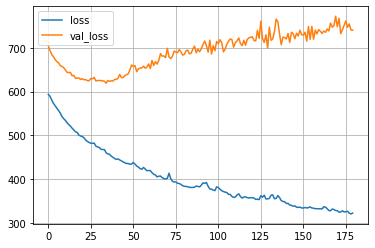

In [10]:
plt.plot(history.history['loss'][20:], label="loss")
plt.plot(history.history['val_loss'][20:], label="val_loss")
plt.legend()
plt.grid()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Predicted')

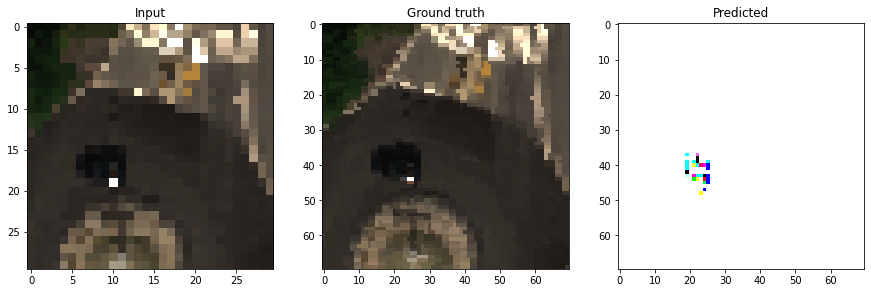

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize = (15,15))
ax1.imshow(X_test[2:3][0][:,:,:])
ax1.set_title("Input")
ax2.imshow(y_test[2:3][0][:,:,:])
ax2.set_title("Ground truth")
ax3.imshow(model.predict(X_test[2:3])[0][:,:,:])
ax3.set_title("Predicted")